In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from scipy.optimize import curve_fit  
import matplotlib.pyplot as plt  
import numpy as np  
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("C:/Users/zhangkun6/Desktop/brow.csv",sep='\t')

In [3]:
data.describe()

,user_id,ts
count,3.207730e+05,320773.000000
mean,4.594670e+07,3.180614
std,2.517548e+07,5.398248
min,1.035400e+04,1.000000
25%,1.852410e+07,1.000000
50%,5.672968e+07,1.000000
75%,6.794579e+07,1.000000
max,7.171326e+07,29.000000


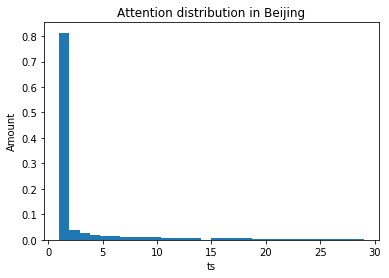

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data['ts'],bins=30,normed=True)
plt.title('Attention distribution in Beijing')
plt.xlabel('ts')
plt.ylabel('Amount')
plt.show()

In [5]:
data.ts.mean()

3.180613705018814

In [6]:
0.9**7

0.4782969000000001

In [7]:
0.8**7

0.20971520000000007

In [8]:
0.4**7

0.0016384000000000006

In [9]:
0.5**7

0.0078125

In [10]:
0.3**7

0.00021869999999999995

In [11]:
data2 = pd.read_csv("C:/Users/zhangkun6/Desktop/brow2.csv",sep='\t')

In [12]:
data2.describe()

,user_id,ts
count,1.062590e+05,106259.000000
mean,4.481399e+07,2.570286
std,2.513685e+07,4.621502
min,1.935200e+04,1.000000
25%,1.735025e+07,1.000000
50%,5.469162e+07,1.000000
75%,6.771223e+07,1.000000
max,7.170248e+07,29.000000


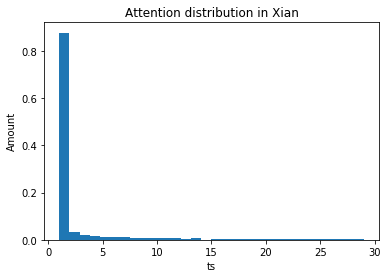

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data2['ts'],bins=30,normed=True)
plt.title('Attention distribution in Xian')
plt.xlabel('ts')
plt.ylabel('Amount')
plt.show()

## 频次分布

In [14]:
# 指数分布
def func(x, a, b, c):  
    return a * np.exp(-b * x) + c  

In [17]:
freq = pd.read_csv("C:/Users/zhangkun6/Desktop/freq.csv",sep='\t')

freq.describe()


,user_id,ts
count,3.482600e+05,3.482610e+05
mean,4.520039e+07,1.974506e+01
std,2.534413e+07,5.832572e+03
min,0.000000e+00,1.000000e+00
25%,1.733849e+07,1.000000e+00
50%,5.585190e+07,2.000000e+00
75%,6.783973e+07,6.000000e+00
max,7.171326e+07,3.342933e+06


In [32]:
x = freq.ts.value_counts().index.tolist()
y = freq.ts.value_counts().tolist()

In [33]:
print(x[0:10])
print(y[0:10])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[120992, 56345, 32876, 22318, 16324, 12400, 9836, 7957, 6585, 5593]


In [34]:
logx = np.log10(x)
logy = np.log10(y)

In [25]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()
model.fit(X=logx.reshape(-1,1),y=logy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
print(model.coef_)
print(model.intercept_)

[-1.68807201]
4.824281881238465


## 以上说明 满足幂律分布
$y=10^{4.8246}x^{-1.6880}$    
$lgy=4.8243-1.6880lgx$


In [50]:
print((10**4.8246)*(1**(-1.6880)))

66772.86334642772


In [ ]:
freq = freq.loc[freq.ts<30,'ts']

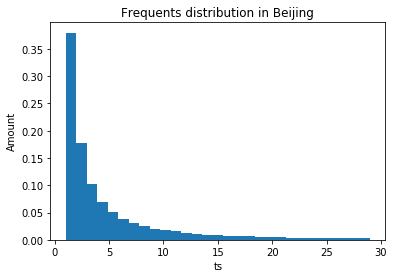

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(freq,bins=29,normed=True)
plt.title('Frequents distribution in Beijing')
plt.xlabel('ts')
plt.ylabel('Amount')
plt.show()

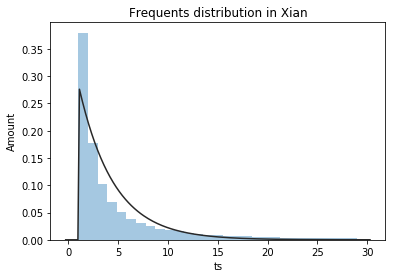

In [161]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(freq,bins=29,fit=stats.expon,kde=False)
plt.title('Frequents distribution in Xian')
plt.xlabel('ts')
plt.ylabel('Amount')
plt.show()

In [164]:
xdata = np.arange(1,30)
ydata = freq.value_counts().tolist()/freq.count()

In [165]:
popt, pcov = curve_fit(func, xdata, ydata)

In [166]:
print(popt)

[0.66493547 0.64647717 0.00925312]


$y=0.665e^{-0.646x}+0.009$

In [128]:
freq2 = pd.read_csv("C:/Users/zhangkun6/Desktop/freq2.csv",sep='\t')
freq2.describe()


,user_id,ts
count,1.111980e+05,111199.000000
mean,4.446849e+07,9.807336
std,2.517133e+07,1702.036279
min,0.000000e+00,1.000000
25%,1.695331e+07,1.000000
50%,5.432552e+07,2.000000
75%,6.763744e+07,3.000000
max,7.170248e+07,547927.000000


In [129]:

freq2 = freq2.loc[freq2.ts<30,'ts']
freq2.describe()

count    110005.000000
mean          3.069315
std           3.832016
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          29.000000
Name: ts, dtype: float64

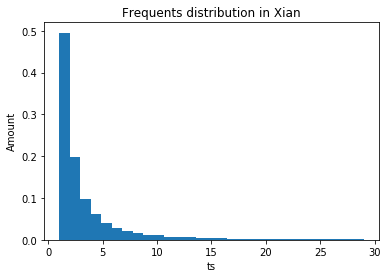

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(freq2,bins=29,normed=True)
plt.title('Frequents distribution in Xian')
plt.xlabel('ts')
plt.ylabel('Amount')
plt.show()

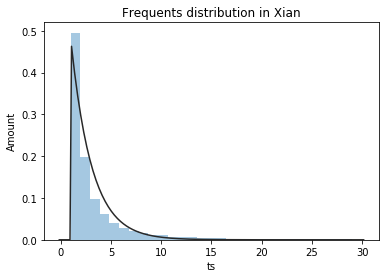

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(freq2,kde=False, fit=stats.expon,bins=29)
plt.title('Frequents distribution in Xian')
plt.xlabel('ts')
plt.ylabel('Amount')
plt.show()

In [ ]:

xdata = np.arange(1,30)
ydata = freq2.value_counts().tolist()/freq2.count()

In [155]:
ydata

array([0.47846916, 0.19199127, 0.09315031, 0.05947002, 0.03856188,
       0.02815327, 0.01987182, 0.01582655, 0.01217217, 0.009945  ,
       0.0075542 , 0.00690878, 0.00563611, 0.00477251, 0.00376347,
       0.00354529, 0.00295441, 0.00250898, 0.00216354, 0.00189082,
       0.00183628, 0.00154538, 0.00138176, 0.00127267, 0.00119085,
       0.0010545 , 0.00081814, 0.00080905, 0.00078178])

In [157]:
popt, pcov = curve_fit(func, xdata, ydata)

In [158]:
popt

array([1.07407251, 0.8328855 , 0.00599158])

$y = 1.074e^{-0.832x}+0.006$

In [159]:
pcov

array([[1.63579829e-03, 1.07049141e-03, 1.05700396e-05],
       [1.07049141e-03, 8.43434209e-04, 1.41199980e-05],
       [1.05700396e-05, 1.41199980e-05, 2.46404489e-06]])